# Projects

Repository metrics that reflect how we are doing with respect to the standard components of integration with GitLab (badges/tests), and ReadTheDocs.

In [1]:
# include common code and config
# selected_pi = 10
%run PIQM_Bootstrap.ipynb

{'pi': 'PI13', 'id': 13, 'start': '2021-12-17T00:00:00Z', 'started': '2021-12-17', 'finish': '2022-03-18T23:59:59Z'}


In [2]:
query_api = client.query_api()
df_projects = query_api.query_data_frame(
    """from(bucket: "gitlab_metrics")
  |> range(start: 2008-03-17T00:00:00Z, stop: {0[finish]})
  |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_pipeline_duration")
  |> drop(columns:["pipeline_last_run_status", "_measurement", "license", "_field"])
  """.format(current_pi))

df_projects


result  table                    _start                     _stop  \
0    _result      0 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
1    _result      1 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
2    _result      2 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
3    _result      3 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
4    _result      4 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
..       ...    ...                       ...                       ...   
226  _result    226 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
227  _result    227 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
228  _result    228 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
229  _result    229 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
230  _result    230 2008-03-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   

                               _time  _value got_coverage got_linting got_rtd  \
0   2019-06-12 19:40:49.861000+00:00  2492.0            0           0       0   
1   2019-07-18 08:47:30.836000+00:00   263.0            0           0       0   
2   2019-09-16 15:28:30.116000+00:00   518.0            0           0       0   
3   2019-10-29 19:11:41.773000+00:00     0.0            0           0       0   
4   2019-10-30 10:34:30.930000+00:00     0.0            0           0       0   
..                               ...     ...          ...         ...     ...   
226 2021-10-05 05:03:32.939000+00:00   402.0            1           1       1   
227 2021-10-13 09:59:31.555000+00:00   698.0            1           1       1   
228 2022-01-27 11:52:06.325000+00:00   524.0            1           1       1   
229 2018-10-24 08:40:54.932000+00:00   829.0            1           1       1   
230 2018-11-29 08:22:28.969000+00:00   758.0            1           1       1   

    got_tests        id                                        project  
0           0  12828461            ska-telescope/sdp/ska-sdp-par-model  
1           0  13372840          ska-telescope/ska-cicd-cpp-build-base  
2           0  14333804                      ska-telescope/sdc/ska-sdc  
3           0  15077844               ska-telescope/CUDA_Deconvolution  
4           0  15088717         ska-telescope/sdp/sep_pipeline_imaging  
..        ...       ...                                            ...  
226         1  30178128                 ska-telescope/ska-low-cbf-fpga  
227         1  30412954  ska-telescope/sdp/ska-sdp-ms-add-derived-data  
228         1  33186816                 ska-telescope/ska-low-cbf-conn  
229         1   9027158                 ska-telescope/ska-tango-images  
230         1   9673989               ska-telescope/ska-tango-examples  

[231 rows x 12 columns]

In [3]:
pis = the_pis.copy()
current = pis.pop(-1)
pi_list = ([current] + pis[: (selected_pi - select_pis) : -1])[::-1]

template_project_trace = """

{0[pi]} = from(bucket: "gitlab_metrics")
  |> range(start: {0[start]}, stop: {0[finish]})
  |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_pipeline_duration")
  |> drop(columns:["pipeline_last_run_status", "_measurement", "license", "_field"])
  |> set(key: "ID",value: "{0[id]}")
  |> set(key: "PI",value: "{0[pi]} ({0[started]})")
"""

# output all the series in reverse order
query = []
tables = ", ".join([pi["pi"] for pi in pi_list])
for pi in pi_list:
#     pi["current_start"] = last_start
    query.append(template_project_trace.format(pi))
query.append("""
union(tables: [{}])
  |> group()
  |> yield(name: "projects")
""".format(
        tables
    )
)
query = "\n".join(query)

# print(query)

query_api = client.query_api()

projects = query_api.query_data_frame(query)
# mrs = mrs[["_value", "_field"]]\
#     .rename(columns={"_value": "Merge Requests", "_field": "PI"})
projects['ID'] = projects['ID'].astype(int)
projects.sort_values(by=['ID', '_time'], ascending=[True, True], inplace=True)
projects

result  table                    _start                     _stop  \
0   projects      0 2020-12-17 00:00:00+00:00 2021-03-18 23:59:59+00:00   
1   projects      0 2020-12-17 00:00:00+00:00 2021-03-18 23:59:59+00:00   
8   projects      0 2020-12-17 00:00:00+00:00 2021-03-18 23:59:59+00:00   
2   projects      0 2020-12-17 00:00:00+00:00 2021-03-18 23:59:59+00:00   
12  projects      0 2020-12-17 00:00:00+00:00 2021-03-18 23:59:59+00:00   
..       ...    ...                       ...                       ...   
87  projects      0 2021-12-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
88  projects      0 2021-12-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
77  projects      0 2021-12-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
78  projects      0 2021-12-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   
79  projects      0 2021-12-17 00:00:00+00:00 2022-03-18 23:59:59+00:00   

                              _time  _value got_coverage got_linting got_rtd  \
0  2020-12-18 06:07:17.385000+00:00     0.0            0           0       0   
1  2020-12-22 14:55:09.539000+00:00   273.0            0           0       0   
8  2021-01-05 14:51:24.260000+00:00   125.0            1           1       0   
2  2021-01-06 06:57:18.996000+00:00     0.0            0           0       0   
12 2021-01-14 12:02:41.210000+00:00   543.0            1           1       1   
..                              ...     ...          ...         ...     ...   
87 2022-02-07 06:09:49.264000+00:00   329.0            1           1       0   
88 2022-02-08 05:37:11.811000+00:00   149.0            1           1       0   
77 2022-02-08 16:25:01.512000+00:00     0.0            0           0       0   
78 2022-02-09 11:07:23.956000+00:00     0.0            0           0       0   
79 2022-02-09 11:08:00.374000+00:00     0.0            0           0       0   

   got_tests        id                                          project  ID  \
0          0  23180104                ska-telescope/sdc/deploy-teamnode   9   
1          0  23258133                 ska-telescope/ska-tango-archiver   9   
8          1  23473321        ska-telescope/sdi/ska-cicd-deploy-mariadb   9   
2          0  23487958        ska-telescope/sdi/ska-cicd-deploy-psi-low   9   
12         1  23664719            ska-telescope/sdi/ska-cicd-automation   9   
..       ...       ...                                              ...  ..   
87         1  33468776                   ska-telescope/ska-landing-page  13   
88         1  33504801          ska-telescope/sdp/ska-sdp-tmlite-server  13   
77         0  33524696  ska-telescope/ska-cicd-gitlab-k8s-agents-config  13   
78         0  33549051             ska-telescope/ems/ska-ems-ramlog-fde  13   
79         0  33549071             ska-telescope/ems/ska-ems-ramlog-ime  13   

                   PI  
0    PI9 (2020-12-17)  
1    PI9 (2020-12-17)  
8    PI9 (2020-12-17)  
2    PI9 (2020-12-17)  
12   PI9 (2020-12-17)  
..                ...  
87  PI13 (2021-12-17)  
88  PI13 (2021-12-17)  
77  PI13 (2021-12-17)  
78  PI13 (2021-12-17)  
79  PI13 (2021-12-17)  

[90 rows x 14 columns]

In [4]:
# total projects
project_stats = projects[['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()
project_stats.sort_values(by=['ID'], ascending=[True], inplace=True)
project_stats['total'] = project_stats['id']['count']
del project_stats['id']

# projects with rtd
project_stats['rtd'] = projects[projects.got_rtd == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with coverage
project_stats['coverage'] = projects[projects.got_coverage == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with linting
project_stats['linting'] = projects[projects.got_linting == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with tests
project_stats['tests'] = projects[projects.got_tests == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

project_stats


ID                 PI total rtd coverage linting tests
                                                         
0   9   PI9 (2020-12-17)    13   3        5       5     5
1  10  PI10 (2021-03-17)    17   4        8       8     8
2  11  PI11 (2021-06-16)    15   4        6       6     6
3  12  PI12 (2021-09-16)    25   3        8       8     8
4  13  PI13 (2021-12-17)    20   1       10      10    10

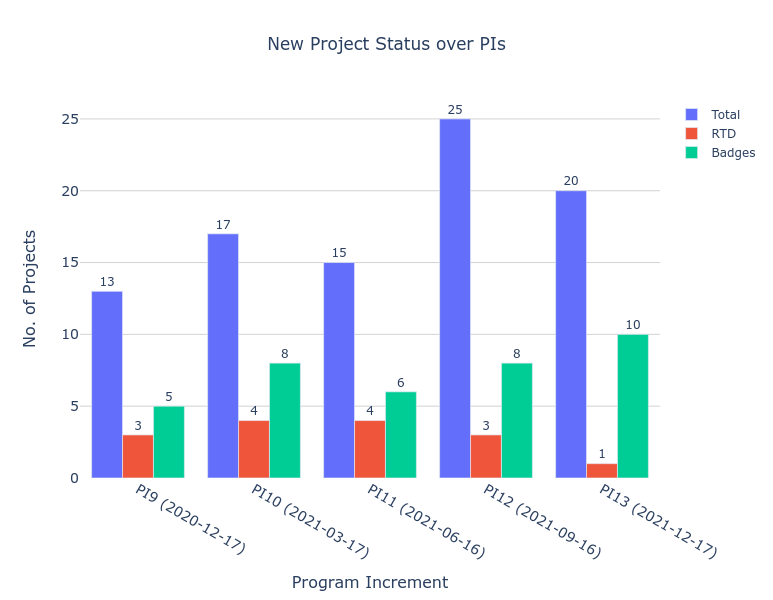

In [5]:
import plotly.graph_objects as go
stack_labels = ['{:.0f}'.format(x) for x in project_stats['total']]

fig = go.Figure(data=[go.Bar(x=project_stats.PI, y=project_stats['total'], name='Total',
     text=['{:.0f}'.format(x) for x in project_stats['total']]),
             go.Bar(x=project_stats.PI, y=project_stats['rtd'], name='RTD',
     text=['{:.0f}'.format(x) for x in project_stats['rtd']]),
             go.Bar(x=project_stats.PI, y=project_stats['linting'], name='Badges',
     text=['{:.0f}'.format(x) for x in project_stats['linting']]),         
                     ])
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_traces( textposition='outside')
fig.update_layout(barmode='group', yaxis=dict(
        title='No. of Projects',
        titlefont_size=16,
        tickfont_size=14,
    ), xaxis=dict(
        title='Program Increment',
        titlefont_size=16,
        tickfont_size=14,
    ), height=600, title='New Project Status over PIs', title_x=0.5, paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()
